In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import models , layers , datasets
from sklearn.model_selection import train_test_split

In [4]:
(train_images, train_labels), (test_images, test_labels) =datasets.cifar10.load_data()

In [5]:
train_images.shape

(50000, 32, 32, 3)

In [6]:
train_labels.shape

(50000, 1)

In [7]:
test_images.shape

(10000, 32, 32, 3)

In [8]:
test_labels.shape

(10000, 1)

In [9]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
train_images

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [11]:
train_images=train_images.reshape(-1,32,32,3)/255
train_images

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [12]:
train_labels=keras.utils.to_categorical(train_labels,10)
train_labels.shape

(50000, 10)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(train_images,train_labels,test_size=0.2,random_state=42)

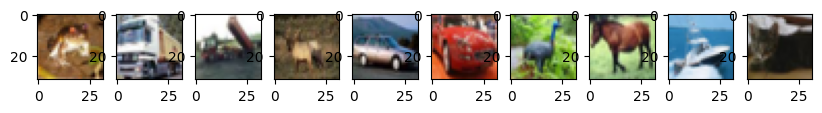

In [ ]:
STT=[0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(10,10))
for i in STT:
    plt.subplot(1,10,i+1)       
    plt.imshow(train_images[i])
    plt.grid(False)
plt.show()

In [ ]:
# Conv -> Conv -> Pool mo hinh sau
# ###2 lan Conv
#conv di dau batch di do
model=models.Sequential([
     ####### Co the them padding='same'
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    # layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    # layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    # layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    # layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [34]:
model.fit(
    X_train,y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test,y_test)
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3386 - loss: 1.7656 - val_accuracy: 0.4929 - val_loss: 1.3901
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4946 - loss: 1.3960 - val_accuracy: 0.5510 - val_loss: 1.2410
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5559 - loss: 1.2391 - val_accuracy: 0.5950 - val_loss: 1.1399
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5979 - loss: 1.1357 - val_accuracy: 0.6284 - val_loss: 1.0343
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6260 - loss: 1.0562 - val_accuracy: 0.6518 - val_loss: 0.9775
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6511 - loss: 0.9885 - val_accuracy: 0.6563 - val_loss: 0.9561
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6745 - loss: 0.9298 - val_accuracy: 0.6775 - val_loss: 0.9112
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6900 - loss: 0.8800 - val_accuracy: 0.

In [35]:
score=model.evaluate(X_test,y_test)
score

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7007 - loss: 0.8458


[0.8458424806594849, 0.7006999850273132]

In [36]:
y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


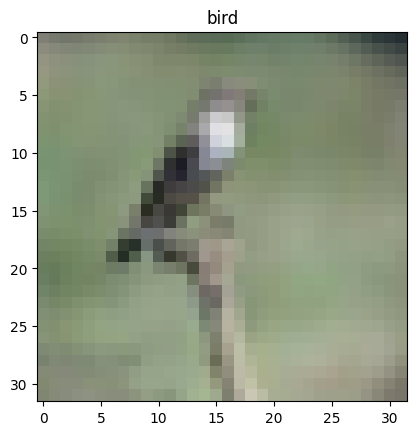

In [43]:
def func(test):
    if test==0:
        return('airplane')
    elif test==1:
            return('automobile')
    elif test==2:
            return('bird')
    elif test==3:
            return('cat')
    elif test==4:
            return('deer')
    elif test==5:
            return('dog')
    elif test==6:
            return('frog')
    elif test==7:
            return('horse')
    elif test==8:
            return('ship')
    else: 
            return('truck')
plt.imshow(X_test[170])
plt.title(func(np.argmax(y_pred[170])))
plt.show()